In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
import statsmodels.api as sm
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from imblearn import over_sampling
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss,accuracy_score,confusion_matrix
import cv2
%matplotlib inline

In [3]:
data_train=pd.read_csv('/content/drive/My Drive/Dance classification/dataset/train.csv')
data_test=pd.read_csv('/content/drive/My Drive/Dance classification/dataset/test.csv')
data_train.head()

,Image,target
0,96.jpg,manipuri
1,163.jpg,bharatanatyam
2,450.jpg,odissi
3,219.jpg,kathakali
4,455.jpg,odissi


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   364 non-null    object
 1   target  364 non-null    object
dtypes: object(2)
memory usage: 5.8+ KB


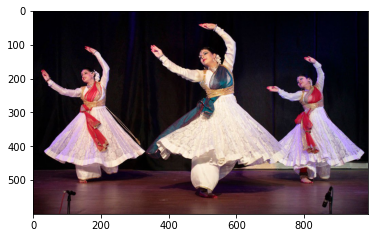

In [5]:
from PIL import Image
img=np.array(Image.open('/content/drive/My Drive/Dance classification/dataset/train/3.jpg'))
plt.imshow(img)

In [6]:
img.shape

(600, 989, 3)

In [0]:
x=data_train['Image']
y=data_train['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,train_size=0.8,random_state=100)

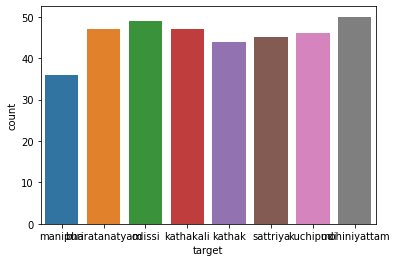

In [8]:
sns.countplot(data_train['target'])

In [0]:
a=[]
for i in data_train['Image']:
  img=np.array(Image.open('/content/drive/My Drive/Dance classification/dataset/train/'+i))
  a.append(img.shape)
data_train['img_shape']=a  

In [21]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   156 non-null    object
dtypes: object(1)
memory usage: 1.3+ KB


In [0]:
data_train.target.unique()

array(['manipuri', 'bharatanatyam', 'odissi', 'kathakali', 'kathak',
       'sattriya', 'kuchipudi', 'mohiniyattam'], dtype=object)

In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_train['target']=le.fit_transform(data_train['target'])

In [0]:
data_train['img_shape'].unique().shape

(238,)

In [0]:
min_width=[]
min_height1=[]
for i in data_train.img_shape.unique():
  min_width.append(i[1])
  min_height1.append(i[0])
print(min(min_width),min(min_height1))   

139 126


In [0]:
def train_set_preparation(data):
  data=list(data)
  train=[]
  img=np.array(Image.open('/content/drive/My Drive/Dance classification/dataset/train/'+data[0]))
  height=200
  width=200
  dim=(width,height)
  resized_img=cv2.resize(img,dim)
  train.append(resized_img)
  data_new=data[1:]
  for i in data_new:
    img=np.array(Image.open('/content/drive/My Drive/Dance classification/dataset/train/'+i))
    height=200
    width=200
    dim=(width,height)
    resized_img=cv2.resize(img,dim)
    train.append(resized_img)
  return train  

In [0]:
def test_set_preparation(data):
  data=list(data)
  test=[]
  img=np.array(Image.open('/content/drive/My Drive/Dance classification/dataset/train/'+data[0]))
  height=200
  width=200
  dim=(width,height)
  resized_img=cv2.resize(img,dim)
  test.append(resized_img)
  data_new=data[1:]
  for i in data_new:
    img=np.array(Image.open('/content/drive/My Drive/Dance classification/dataset/train/'+i))
    height=200
    width=200
    dim=(width,height)
    resized_img=cv2.resize(img,dim)
    test.append(resized_img)
  return test  

In [0]:
train=train_set_preparation(x_train)

In [0]:
train=np.array(train)
train.shape

(291, 200, 200, 3)

In [0]:
test=test_set_preparation(x_test)
test=np.array(test)
test.shape

(73, 200, 200, 3)

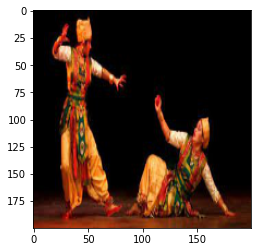

In [0]:
plt.imshow(test[20,:,:,:])

In [23]:
# building deep learning model
from keras.applications import VGG19
conv_base=VGG19(include_top=False,input_shape=(224,224,3),weights='imagenet')
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [50]:
from keras import layers
from keras import models


model=models.Sequential()
#model.add(conv_base)
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(256,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(256,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(8,activation='sigmoid'))
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 24, 24, 128)     

In [51]:
print('no of trainable weights before freezing conv_base=',len(model.trainable_weights))
conv_base.trainable=False
print('no of trainable weights after freezing conv_base=',len(model.trainable_weights))

no of trainable weights before freezing conv_base= 16
no of trainable weights after freezing conv_base= 16


In [0]:
from keras.utils import to_categorical
#y_train1=to_categorical(y_train)
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
history=model.fit_generator(train_generator,steps_per_epoch=20,epochs=100,validation_data=validation_generator,validation_steps=20)

Epoch 1/100
20/20 [==============================] - 40s 2s/step - loss: 2.1381 - accuracy: 0.1257 - val_loss: 2.0807 - val_accuracy: 0.1889
Epoch 2/100
20/20 [==============================] - 35s 2s/step - loss: 2.0814 - accuracy: 0.1111 - val_loss: 2.0814 - val_accuracy: 0.1556
Epoch 3/100
20/20 [==============================] - 39s 2s/step - loss: 2.1982 - accuracy: 0.1143 - val_loss: 2.0615 - val_accuracy: 0.1086
Epoch 4/100
20/20 [==============================] - 36s 2s/step - loss: 2.0738 - accuracy: 0.1111 - val_loss: 1.9955 - val_accuracy: 0.1722
Epoch 5/100
20/20 [==============================] - 38s 2s/step - loss: 2.0694 - accuracy: 0.1486 - val_loss: 2.1745 - val_accuracy: 0.1371
Epoch 6/100
20/20 [==============================] - 36s 2s/step - loss: 2.0857 - accuracy: 0.1778 - val_loss: 2.0525 - val_accuracy: 0.1778
Epoch 7/100
20/20 [==============================] - 39s 2s/step - loss: 2.0869 - accuracy: 0.1778 - val_loss: 2.0666 - val_accuracy: 0.2000
Epoch 8/100
2

In [20]:
 from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

train_dir='/content/drive/My Drive/Dance classification/dataset/train'
test_dir='/content/drive/My Drive/Dance classification/dataset/test'

train_generator=train_datagen.flow_from_dataframe(dataframe=data_train,directory=train_dir,
                                                  x_col='Image',y_col='target',
                                                  target_size=(224,224),color_mode='rgb',
                                                  batch_size=9,class_mode='categorical',
                                                  shuffle=True,seed=42)

test_generator=test_datagen.flow_from_dataframe(dataframe=data_test,directory=test_dir,
                                                x_col='Image',y_col=None,
                                                target_size=(224,224),color_mode='rgb',
                                                batch_size=1,class_mode=None,
                                                shuffle=False,seed=42)

validation_generator=train_datagen.flow_from_dataframe(dataframe=data_train,directory=train_dir,
                                                       x_col='Image',y_col='target',
                                                       target_size=(224,224),color_mode='rgb',
                                                       batch_size=9,class_mode='categorical',
                                                       shuffle=True,seed=42)

Found 364 validated image filenames belonging to 8 classes.
Found 156 validated image filenames.
Found 364 validated image filenames belonging to 8 classes.


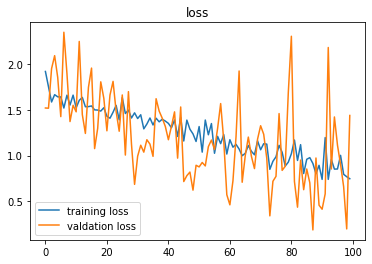

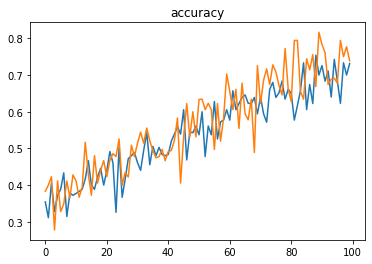

In [43]:
a=history.history['loss']
b=history.history['val_loss']
c=history.history['accuracy']
d=history.history['val_accuracy']
e=range(100)


plt.plot(e,a,label='training loss')
plt.plot(e,b,label='valdation loss')
plt.title('loss')
plt.legend()
plt.figure()

plt.plot(e,c,label='training accuracy')
plt.plot(e,d,label='validation accuracy')
plt.title('accuracy')
plt.show()


In [41]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])
